# TW population 台灣人口圖解 資料日期 (106/12)

### 導入套件 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### 讀入資料'People107.csv'
#### 原始資料範例

In [2]:
pp = pd.read_csv('TW population_10612.csv')
pp.head()

,統計年月,區域別,村里,戶數,人口數,人口數-男,人口數-女,0歲-男,0歲-女,1歲-男,...,96歲-男,96歲-女,97歲-男,97歲-女,98歲-男,98歲-女,99歲-男,99歲-女,100歲以上-男,100歲以上-女
0,10612,新北市板橋區,留侯里,674,1645,775,870,9,3,8,...,0,0,0,0,0,0,0,0,0,1
1,10612,新北市板橋區,流芳里,640,1567,730,837,7,12,4,...,0,0,0,0,1,0,0,0,0,0
2,10612,新北市板橋區,赤松里,324,831,405,426,2,1,3,...,0,0,0,0,0,0,0,0,0,1
3,10612,新北市板橋區,黃石里,436,1147,568,579,3,4,10,...,0,0,0,1,0,0,0,0,1,0
4,10612,新北市板橋區,挹秀里,780,1884,904,980,3,5,4,...,1,1,0,0,2,0,0,0,0,0


#### 整理資料:

In [3]:
pcol = list(pp.columns[7:])
pp['縣市'] = pp['區域別'].str[0:3]
pp['鄉鎮區'] = pp['區域別'].str[3:]
pp = pd.DataFrame(pp, columns=['縣市', '鄉鎮區', '村里'] + pcol)
pp = pp.set_index(['縣市', '鄉鎮區', '村里'])
pp.columns = pp.columns.str.split('歲').str[0]
pp = pp.T
pp.index = pp.index.astype(int)
pp.index.name = 'age'
pp['sex'] = ['M', 'F']*101
pp = pp.set_index(['sex', pp.index,])
pp = pp.sort_index()
pp = pp.unstack(level=0)
#pp['decade'] = ((pp.index//10)*10).astype(str) + 's'
#pp = pp.set_index(['decade', pp.index,])
pp = pp.T

#### 前10筆範例

In [4]:
pp.head(8)

age              0    1    2    3    4    5    6    7    8    9    ...  91   \
縣市  鄉鎮區 村里  sex                                                    ...        
新北市 板橋區 留侯里 F      3    6   10    3    6    9    6    7   10   10  ...    0   
            M      9    8    6    7    3   12    3    5   10    7  ...    0   
        流芳里 F     12    6    6   10    5    8    9    5    6    7  ...    1   
            M      7    4    5    7   10   12   12    6    7    9  ...    0   
        赤松里 F      1    4    1    8    3    8    6    5    2    4  ...    2   
            M      2    3    3    3    1    3    6    1    7    8  ...    1   
        黃石里 F      4    6    5   10    5    9   10    3    6    4  ...    2   
            M      3   10    3    4    5    5    8    3   13   14  ...    0   

age              92   93   94   95   96   97   98   99   100  
縣市  鄉鎮區 村里  sex                                               
新北市 板橋區 留侯里 F      0    2    1    0    0    0    0    0    1  
            M      0    0    2    0    0    0    0    0    0  
        流芳里 F      2    1    3    1    0    0    0    0    0  
            M      1    0    1    1    0    0    1    0    0  
        赤松里 F      1    0    0    0    0    0    0    0    1  
            M      1    0    0    0    0    0    0    0    0  
        黃石里 F      0    1    1    0    0    1    0    0    0  
            M      1    0    0    1    0    0    0    0    1  

[8 rows x 101 columns]

### 男女總人口數(年齡排序):

In [5]:
age = pp.groupby('sex').sum()
age

age,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
sex,,,,,,,,,,,,,,,,,,,,,
F,88352,101293,103890,103796,95348,114741,96743,81045,93650,95102,...,13272,10179,7566,5809,4577,3379,2238,1419,973,1805
M,95090,108888,112410,110720,102612,122946,104314,88178,101632,104081,...,11458,8856,6127,4431,3564,2619,1598,1080,724,1521


### 圖形:

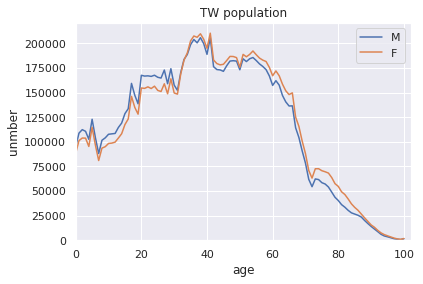

In [6]:
plt.plot(age.values[1], label='M')
plt.plot(age.values[0], label='F')
plt.title('TW population')
plt.xlim(0, 102)
plt.ylim(0,)
plt.ylabel('unmber')
plt.xlabel('age')
plt.legend()

### 22縣市總人口比較:

In [7]:
city = pp.groupby('縣市').sum()
city

age,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
縣市,,,,,,,,,,,,,,,,,,,,,
南投縣,3068,3443,3244,3228,2991,3828,3572,3193,3521,3685,...,665,472,319,264,194,158,77,57,45,57
嘉義市,1787,2229,2202,2298,2197,2810,2465,2181,2436,2652,...,292,206,166,106,89,69,30,27,18,36
嘉義縣,2684,2900,3024,2886,2781,3384,2995,2696,3187,3319,...,785,542,402,313,204,207,98,70,35,81
基隆市,2082,2456,2436,2252,2277,2875,2468,2259,2619,2718,...,431,344,208,190,158,89,58,35,39,87
宜蘭縣,3168,3532,3472,3506,3512,3989,3570,3180,3680,3636,...,581,414,280,212,178,106,82,54,36,73
屏東縣,4760,5404,5581,5596,5179,6487,5578,5060,5705,6087,...,820,647,406,305,245,164,108,70,46,86
彰化縣,11667,12475,11702,10702,9621,12200,10463,8896,10574,11014,...,1440,1095,752,606,469,307,206,131,73,116
新北市,29103,33118,33650,33891,31132,38473,33783,28446,32525,32791,...,3387,2594,1917,1483,1237,937,595,439,289,593
新竹市,4095,4821,5255,5498,5138,6282,5449,4469,5134,5124,...,458,358,262,227,131,113,71,53,36,64


city.index : 

Index(['南投縣', '嘉義市', '嘉義縣', '基隆市', '宜蘭縣', '屏東縣', '彰化縣', '新北市', '新竹市', '新竹縣',
       '桃園市', '澎湖縣', '臺中市', '臺北市', '臺南市', '臺東縣', '花蓮縣', '苗栗縣', '連江縣', '金門縣',
       '雲林縣', '高雄市'],
      dtype='object', name='縣市')

### 比較五都
#### 台北市TPE  新北市TPH  台中市TXG   台南市TNN  高雄市KHH

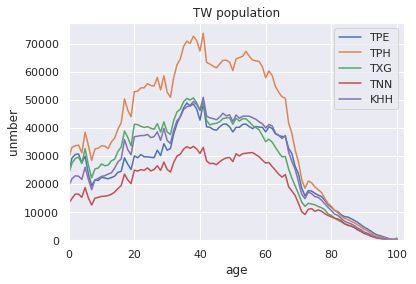

In [8]:
plt.plot(city.values[13], label='TPE')
plt.plot(city.values[7], label='TPH')
plt.plot(city.values[12], label='TXG')
plt.plot(city.values[14], label='TNN')
plt.plot(city.values[21], label='KHH')
plt.title('TW population')
plt.xlim(0, 102)
plt.ylim(0,)
plt.ylabel('unmber')
plt.xlabel('age')
plt.legend()

#### 人口差異大 調成百分比來比較:

In [9]:
ctysum = city.sum(axis=1)
city2 = ((city.T/ctysum)*100).T

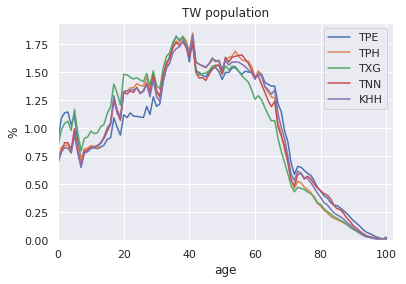

In [10]:
plt.plot(city2.values[13], label='TPE')
plt.plot(city2.values[7], label='TPH')
plt.plot(city2.values[12], label='TXG')
plt.plot(city2.values[14], label='TNN')
plt.plot(city2.values[21], label='KHH')
plt.title('TW population')
plt.xlim(0, 102)
plt.ylim(0,)
plt.ylabel('%')
plt.xlabel('age')
plt.legend()

### 老齡化城市
65歲以上為老齡人口 表列出比例

In [11]:
city2[city2.columns[city2.columns>64]].sum(axis=1).sort_values().astype(str).str[0:5] + ' %'

縣市
連江縣    10.56 %
桃園市    10.78 %
臺中市    11.50 %
新竹市    11.50 %
新竹縣    11.98 %
金門縣    12.24 %
新北市    12.60 %
嘉義市    14.15 %
高雄市    14.21 %
臺南市    14.38 %
彰化縣    14.77 %
基隆市    14.81 %
花蓮縣    15.32 %
宜蘭縣    15.33 %
苗栗縣    15.41 %
澎湖縣    15.53 %
臺東縣    15.55 %
屏東縣    15.82 %
臺北市    16.36 %
南投縣    16.52 %
雲林縣    17.55 %
嘉義縣    18.46 %
dtype: object

### 畫圖最大差異:
### 老齡城市最嚴重 : 嘉義縣CHY  最輕微 : 連江縣LNN

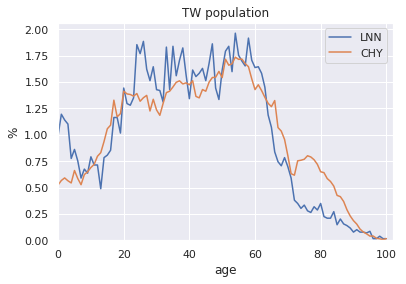

In [12]:
plt.plot(city2.values[18], label='LNN')
plt.plot(city2.values[2], label='CHY')
plt.title('TW population')
plt.xlim(0, 102)
plt.ylim(0,)
plt.ylabel('%')
plt.xlabel('age')
plt.legend()

### 老人鄉鎮區

In [13]:
con = pp.groupby(['鄉鎮區', '縣市']).sum()
consum = con.sum(axis=1)

In [14]:
con = ((con.T/consum)*100).T
conp = con[con.columns[con.columns>64]].sum(axis=1).sort_values().astype(str).str[0:5]
(conp.astype(str).str[0:5] + '%')
conp.tail(10)

鄉鎮區  縣市 
義竹鄉  嘉義縣    24.51
鹿草鄉  嘉義縣    24.83
雙溪區  新北市    25.10
六腳鄉  嘉義縣    25.46
龍崎區  臺南市    25.75
峨眉鄉  新竹縣    25.78
獅潭鄉  苗栗縣    26.23
左鎮區  臺南市    26.94
田寮區  高雄市    27.67
平溪區  新北市    28.37
dtype: object

### 老齡最嚴重平溪區(Pingxi)和最輕微那瑪夏區(Namaxia)比較

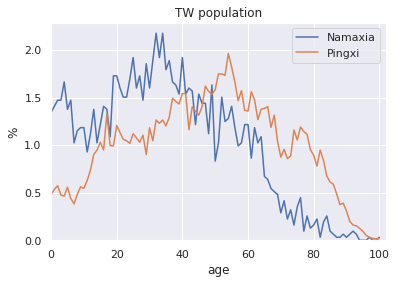

In [15]:
plt.plot(con.loc[conp.index[0]], label='Namaxia')
plt.plot(con.loc[conp.index[358]], label='Pingxi')
plt.title('TW population')
plt.xlim(0, 102)
plt.ylim(0,)
plt.ylabel('%')
plt.xlabel('age')
plt.legend()

### 學齡兒童統計:
22個縣市 未上小學的兒童年齡0~6歲

In [16]:
city2[city2.columns[city2.columns<7]].sum(axis=1).sort_values().astype(str).str[0:5] + ' %'

縣市
嘉義縣    4.040 %
基隆市    4.535 %
屏東縣    4.649 %
南投縣    4.664 %
雲林縣    4.975 %
臺東縣    5.176 %
宜蘭縣    5.420 %
金門縣    5.457 %
澎湖縣    5.489 %
花蓮縣    5.505 %
高雄市    5.631 %
臺南市    5.833 %
新北市    5.848 %
嘉義市    5.934 %
苗栗縣    5.949 %
彰化縣    6.146 %
連江縣    6.824 %
臺中市    7.048 %
桃園市    7.298 %
臺北市    7.303 %
新竹縣    7.786 %
新竹市    8.282 %
dtype: object

### 最多兒童新竹市(HSC) 最少兒童嘉義市(CHY)

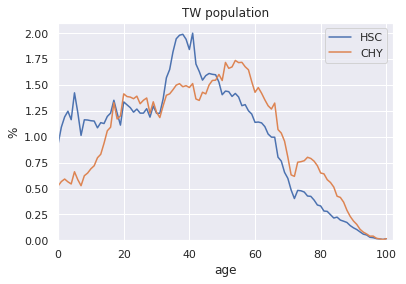

In [17]:
plt.plot(city2.values[8], label='HSC')
plt.plot(city2.values[2], label='CHY')
plt.title('TW population')
plt.xlim(0, 102)
plt.ylim(0,)
plt.ylabel('%')
plt.xlabel('age')
plt.legend()

### 在學學生 年紀7~22歲

In [18]:
city2.iloc[:,7:23].sum(axis=1).sort_values().astype(str).str[0:5] + ' %'

縣市
連江縣    14.42 %
金門縣    14.67 %
臺北市    14.69 %
嘉義縣    15.81 %
臺南市    15.98 %
基隆市    16.09 %
高雄市    16.10 %
新北市    16.23 %
澎湖縣    16.25 %
屏東縣    16.40 %
南投縣    16.73 %
花蓮縣    16.80 %
雲林縣    16.98 %
臺東縣    17.06 %
宜蘭縣    17.07 %
苗栗縣    17.20 %
彰化縣    17.60 %
臺中市    18.23 %
桃園市    18.56 %
新竹市    19.03 %
嘉義市    19.13 %
新竹縣    19.29 %
dtype: object

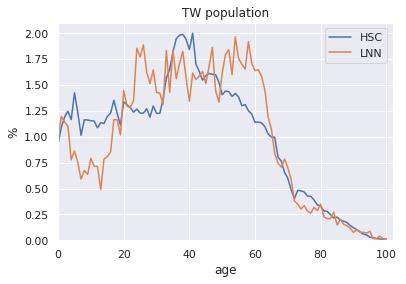

In [19]:
plt.plot(city2.values[8], label='HSC')
plt.plot(city2.values[18], label='LNN')
plt.title('TW population')
plt.xlim(0, 102)
plt.ylim(0,)
plt.ylabel('%')
plt.xlabel('age')
plt.legend()

### 新竹市22年穩定輸出的出生率 新竹市竹科工作穩定應該有正相關 敢生小孩

### 適婚年齡比例:
年齡22~38設為適婚年齡

In [20]:
cityage = pp.groupby(['縣市', 'sex']).sum()
city_F = cityage.iloc[:,22:39].sum(axis=1)[:, 'F']
city_M = cityage.iloc[:,22:39].sum(axis=1)[:, 'M']
city_FM = city_F/city_M
city_FM.sort_values(ascending=False)

縣市
臺北市    1.062572
金門縣    1.026588
新竹市    1.017336
嘉義市    1.000125
臺中市    0.984699
桃園市    0.983077
新北市    0.976038
高雄市    0.964261
臺南市    0.961854
新竹縣    0.960520
彰化縣    0.932016
宜蘭縣    0.930264
基隆市    0.925301
澎湖縣    0.918688
花蓮縣    0.918625
雲林縣    0.913965
苗栗縣    0.913918
屏東縣    0.908177
南投縣    0.891052
嘉義縣    0.890458
臺東縣    0.880789
連江縣    0.750872
dtype: float64

# 台北市的"妹"比例最多
### 台北市的男女分布呢?

In [21]:
city_M = cityage.iloc[:,22:39].iloc[1::2]
city_F = cityage.iloc[:,22:39].iloc[0::2]

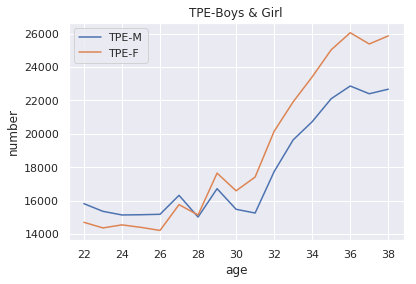

In [22]:
plt.plot(city_M.iloc[13], label='TPE-M')
plt.plot(city_F.iloc[13], label='TPE-F')
plt.title('TPE-Boys & Girl')
plt.ylabel('number')
plt.xlabel('age')
plt.legend()

# 28歲黃金交叉